In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [61]:
# Read File
level3_dataset_df = pd.read_csv('/content/Dataset.csv')
level3_dataset_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [62]:
level3_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [63]:
level3_dataset_df.shape

(9551, 21)

In [64]:
level3_dataset_df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


# **Task 1: Restaurant Reviews**

Analyze the text reviews to identify the most
common positive and negative keywords.

Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [65]:
#Analyze the text reviews to identify the most common positive and negative keywords.

rating_keywords = level3_dataset_df['Rating text'].str.split(expand=True).stack().value_counts()

positive_words = ['Excellent', 'Very', 'Good', 'Great', 'Amazing', 'Superb']
negative_words = ['Poor', 'Bad', 'Terrible', 'Disappointing', 'Awful']

positive_counts = rating_keywords[rating_keywords.index.isin(positive_words)]
negative_counts = rating_keywords[rating_keywords.index.isin(negative_words)]

print("Top Positive Keywords:")
print(positive_counts)
print("\nTop Negative Keywords:")
#print(negative_counts)

Top Positive Keywords:
Good         3179
Very         1079
Excellent     301
Name: count, dtype: int64

Top Negative Keywords:


In [66]:
#Calculate the average length of reviews and explore if there is a relationship between review length and rating.
level3_dataset_df['Review Length'] = level3_dataset_df['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = level3_dataset_df['Review Length'].mean()
print(f"Average Review Length: {avg_length:.2f} words")
print("\nRelationship between Review Length and Rating:")
print(level3_dataset_df.groupby('Aggregate rating')['Review Length'].mean())

Average Review Length: 1.34 words

Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


# **Task 2: Votes Analysis**

Identify the restaurants with the highest and
lowest number of votes.

Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [67]:
#Identify the restaurants with the highest and lowest number of votes.

restaurant_highest_votes = level3_dataset_df[level3_dataset_df['Votes'] == level3_dataset_df['Votes'].max()]
print("Restaurants with the highest number of votes:")
print(restaurant_highest_votes[['Restaurant Name', 'Votes']])

restaurant_lowest_votes = level3_dataset_df[level3_dataset_df['Votes'] == level3_dataset_df['Votes'].min()]
print("Restaurants with the lowest number of votes:")
print(restaurant_lowest_votes[['Restaurant Name', 'Votes']])

Restaurants with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934
Restaurants with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


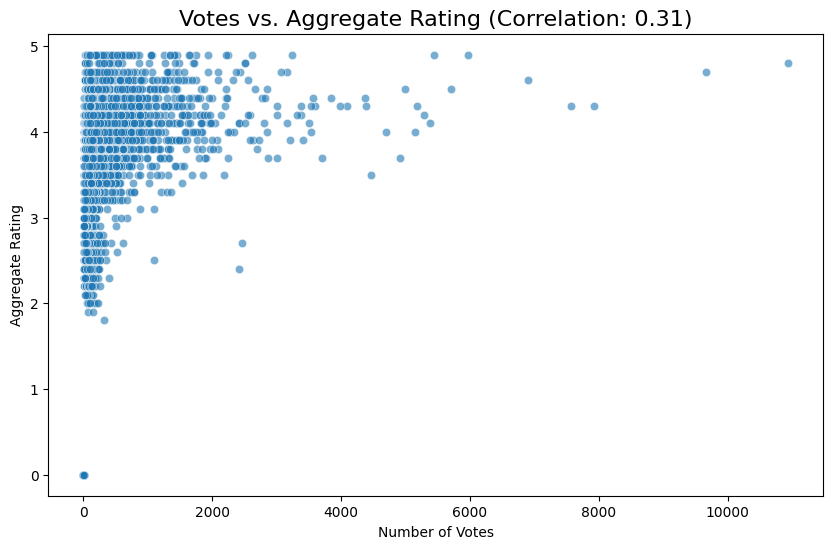

In [68]:
#Analyze if there is a correlation between the number of votes and the rating of a restaurant.

correlation = level3_dataset_df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=level3_dataset_df, alpha=0.6)
plt.title(f"Votes vs. Aggregate Rating (Correlation: {correlation:.2f})", fontsize=16)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()

# **Task 3: Price Range vs. Online Delivery and Table Booking**

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

Determine if higher-priced restaurants are
more likely to offer these services.

Text(0.5, 1.0, 'Relationship between Price Range and Availability of Table Booking & Online Delivery')

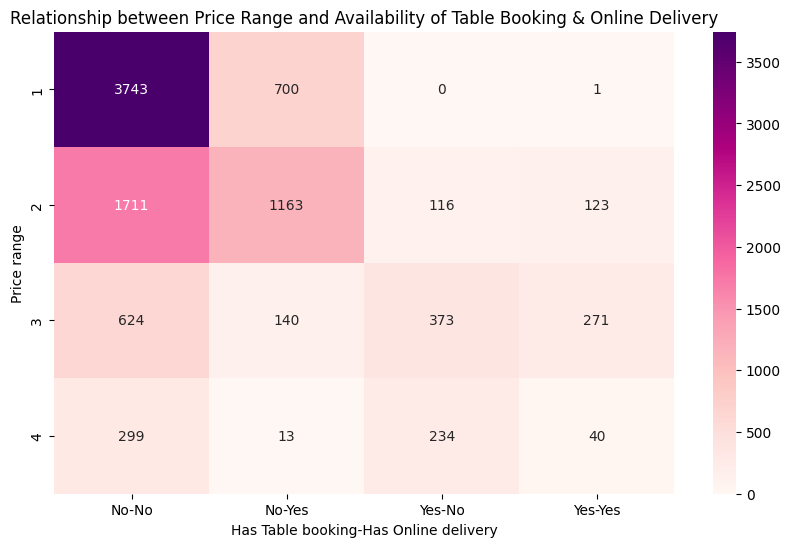

In [69]:
#Relationship between the price range and the availability of online delivery and table booking.
plt.figure(figsize=(10, 6))
heatmap = pd.crosstab(level3_dataset_df['Price range'], [level3_dataset_df['Has Table booking'], level3_dataset_df['Has Online delivery']])
sns.heatmap(heatmap, annot=True, fmt='d', cmap='RdPu', cbar=True)
plt.title('Relationship between Price Range and Availability of Table Booking & Online Delivery')

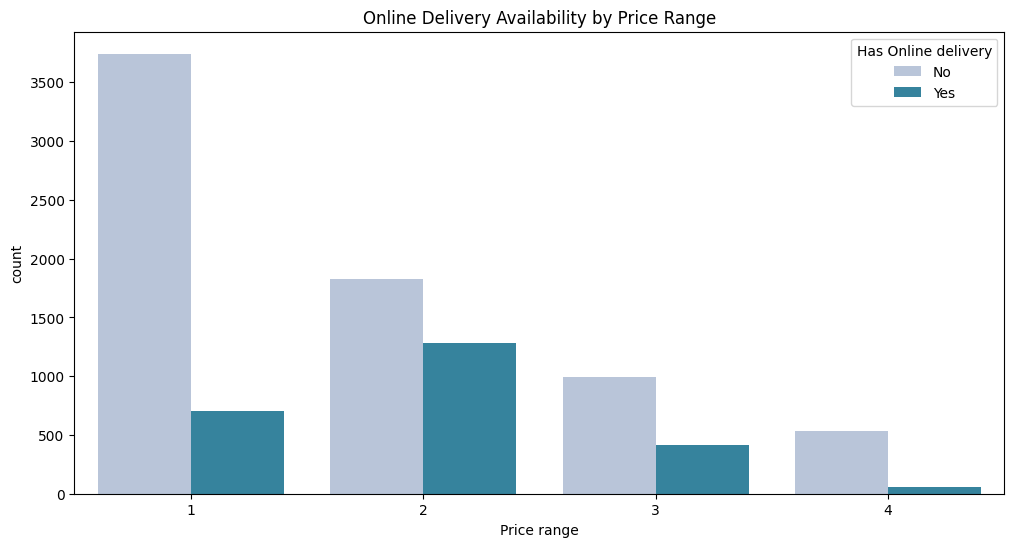

In [70]:
#Determine if higher-priced restaurants are more likely to offer these services
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=level3_dataset_df, palette='PuBuGn')
plt.title('Online Delivery Availability by Price Range')
plt.show()

Text(0.5, 1.0, 'Table Booking Availability by Price Range')

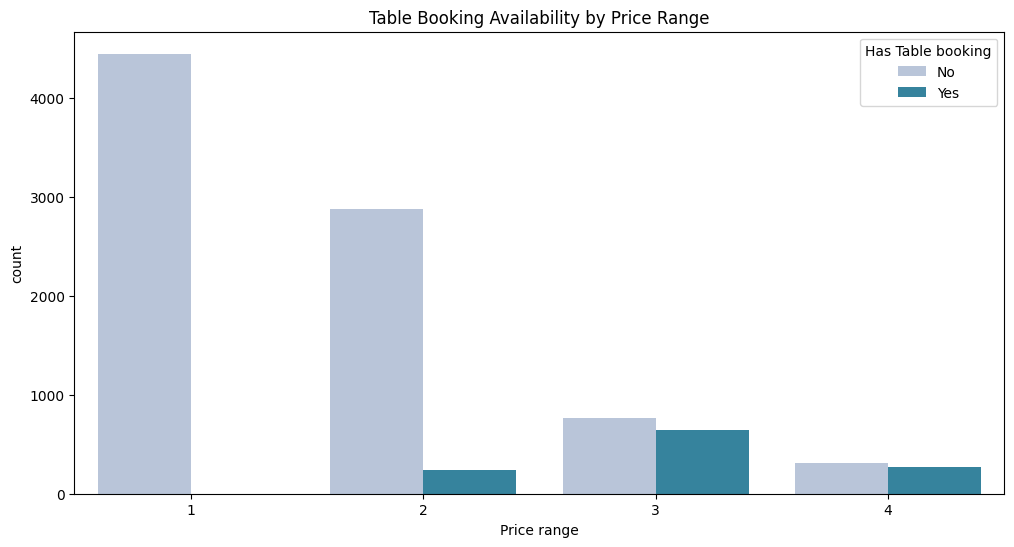

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=level3_dataset_df, palette='PuBuGn')
plt.title('Table Booking Availability by Price Range')